# Handwritten digits classification

In [15]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [16]:
#load handwritten digits dataset from keras
(X_train,y_train), (X_test,y_test) = keras.datasets.mnist.load_data()

In [17]:
len(X_train)

60000

In [18]:
len(X_test)

10000

In [19]:
#visualize one sample -> 28x28 image
X_train[0].shape

(28, 28)

In [20]:
#0 -> black, 255 -> white
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

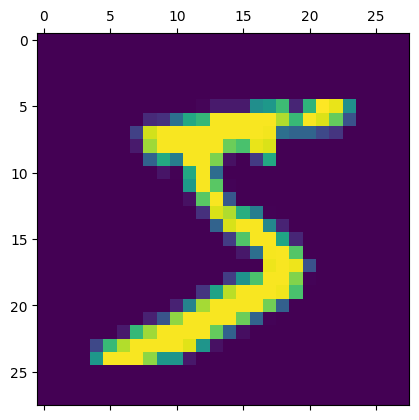

In [21]:
#visualize the actual image of the first training image
plt.matshow(X_train[0])

In [22]:
# y contains the classification of the image (0-9)
y_train[0]

5

In [23]:
X_train.shape

(60000, 28, 28)

In [24]:
#scale the data -> values between 0 and 1
X_train = X_train / 255
X_test = X_test / 255

In [25]:
#flatten the 2d array for a single dimensional array of 784 elements. From (6000,28,28) to (6000,784)
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)

print(X_train_flattened.shape)
print(X_test_flattened.shape)

(60000, 784)
(10000, 784)


In [26]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

Simple neural network with input layer of 784 elements and output layer with 10 elements.

In [27]:
# nn model
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,), activation = 'sigmoid' )
])

#compile the model
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
    )

#training the model
model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4705 - accuracy: 0.8764
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3045 - accuracy: 0.9148
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2839 - accuracy: 0.9209
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2736 - accuracy: 0.9232
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2668 - accuracy: 0.9255


In [28]:
#evaluating the model with test dataset
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2646 - accuracy: 0.9265


[0.2646344006061554, 0.9265000224113464]

Test predictions

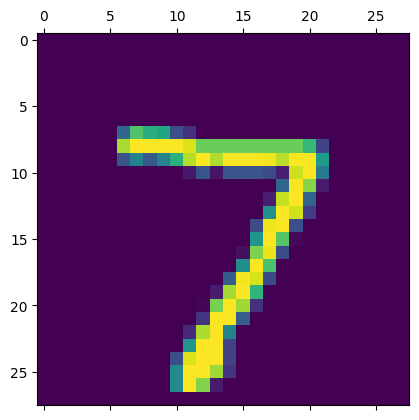

In [29]:
# see the first image on test dataset
plt.matshow(X_test[0])

In [30]:
#predict every image
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 1s 1ms/step


array([2.9843148e-02, 3.3562938e-07, 5.7986077e-02, 9.6305180e-01,
       3.1303184e-03, 1.1692292e-01, 1.3089129e-06, 9.9987525e-01,
       1.0957153e-01, 7.1389765e-01], dtype=float32)

In [31]:
#maximum score
np.argmax(y_predicted[0]) #it gives the index of the maximum value

7

In [33]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

The y_test is an array 0 to 9 but the y_predicted is the scores. I need to convert y_predicted to the actual predicted value and not the score.

In [32]:
#use np.argmax to all the images in y_predicted
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [34]:
#confusion matrix
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    1,    2,    0,    4,    6,    2,    2,    1],
       [   0, 1114,    3,    2,    0,    1,    4,    2,    9,    0],
       [   4,    7,  938,   11,   11,    3,   12,   10,   32,    4],
       [   4,    0,   24,  903,    2,   33,    1,   13,   22,    8],
       [   2,    1,    4,    1,  924,    0,    8,    3,   10,   29],
       [  10,    3,    4,   26,   12,  777,   15,    8,   30,    7],
       [  10,    3,    8,    1,    8,   11,  913,    2,    2,    0],
       [   1,    5,   22,    6,   10,    0,    0,  951,    2,   31],
       [   5,    8,    8,   16,    9,   25,   10,   13,  873,    7],
       [  10,    7,    1,    9,   35,    5,    0,   25,    7,  910]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

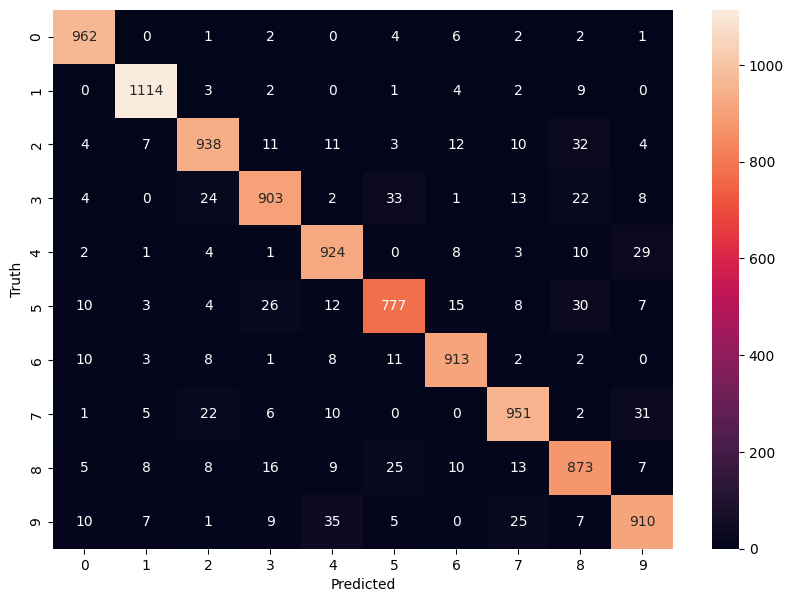

In [35]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Neural network with a hidden layer.

In [36]:
# nn model
model = keras.Sequential([
    keras.layers.Dense(100, input_shape = (784,), activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

#compile the model
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
    )

#training the model
model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2810 - accuracy: 0.9210
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1292 - accuracy: 0.9616
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0896 - accuracy: 0.9737
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0694 - accuracy: 0.9788
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0546 - accuracy: 0.9832


In [37]:
#evaluating the model with test dataset
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0825 - accuracy: 0.9763


[0.08252866566181183, 0.9763000011444092]

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

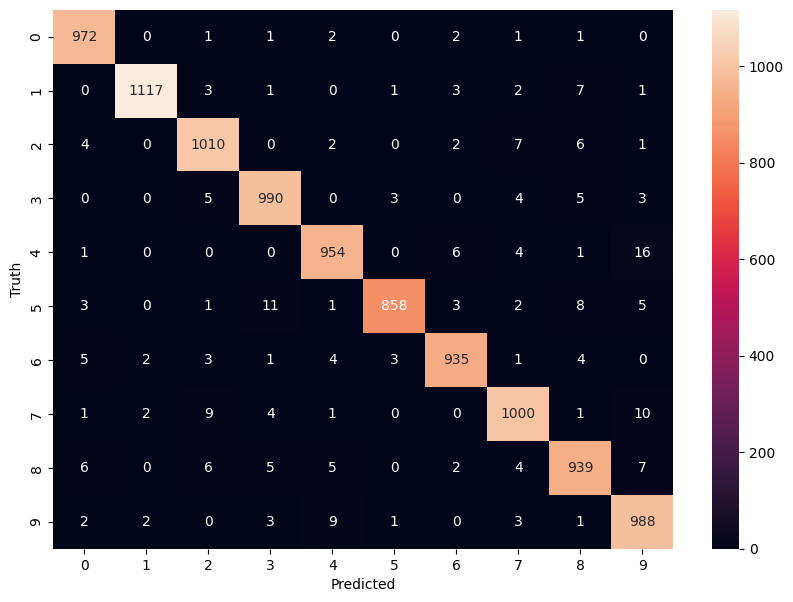

In [38]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Previously I flattened the array manually but keras can do it automatically.

In [39]:
# nn model
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

#compile the model
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
    )

#training the model
model.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2731 - accuracy: 0.9229
Epoch 2/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1261 - accuracy: 0.9625
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0887 - accuracy: 0.9737
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0673 - accuracy: 0.9787
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0524 - accuracy: 0.9836


In [41]:
#evaluating the model with test dataset
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0829 - accuracy: 0.9744


[0.08290121704339981, 0.974399983882904]